# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type

# Original method developed prior to reading full instructions to use groupby
# total_rides_df = pyber_data_df["type"].value_counts()
# total_rides_df = total_rides_df.to_frame()
# total_rides_df.rename(columns={"type":"total_rides"},inplace = True)

# Appropriate method as requested by the challenge
total_rides_by_city_type = pyber_data_df.groupby(["type"])["ride_id"].count()
total_rides_by_city_type.name = "Total Rides"

In [4]:
# 2. Get the total drivers for each city type
total_drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_city_type.name = "Total Drivers"
total_drivers_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: Total Drivers, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fare_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_by_city_type.name = "Total Fares"

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_by_city_type = total_fare_by_city_type/total_rides_by_city_type
average_fare_by_city_type.name = "Average Fare per Ride"

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver_by_city_type = total_fare_by_city_type/total_drivers_by_city_type
average_fare_per_driver_by_city_type.name = "Average Fare per Driver"

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.concat([total_rides_by_city_type,total_drivers_by_city_type,total_fare_by_city_type,average_fare_by_city_type,average_fare_per_driver_by_city_type],axis=1)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
pyber_summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

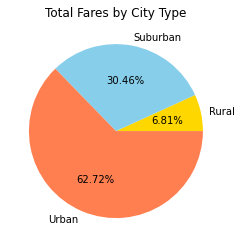

In [12]:
# Adding this pie plot in order to quickly assess fare percentages for reporting purposes
colors = ["gold","skyblue","coral"]
plt.pie(pyber_summary_df["Total Fares"],autopct="%.2f%%",labels=pyber_summary_df.index,colors=colors)
plt.title("Total Fares by City Type")
plt.savefig("Analysis/pie_plot_of_fare_percentages.png",metadata={"creator":"EM"})

In [ ]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [ ]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)



## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [ ]:
# 1. Read the merged DataFrame
pyber_summary_df


In [ ]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_date_df = pyber_data_df.groupby(["type","date"]).sum()

type_date_df.head()

In [ ]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.

type_date_data_df = type_date_df.reset_index()

type_date_data_df.head()

In [ ]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_date_pivot_df = type_date_data_df.pivot(index = "date",columns="type",values="fare")
type_date_pivot_df.head(10)

# type_date_pivot_df.dtypes

In [ ]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_range_select_df = type_date_pivot_df.loc['2019-01-01':'2019-04-28']
date_range_select_df.head()

In [ ]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

date_range_select_df.index = pd.to_datetime(date_range_select_df.index)
date_range_select_df.head()

In [ ]:
# 7. Check that the datatype for the index is datetime using df.info()
date_range_select_df.info()

In [ ]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
date_range_select_df = date_range_select_df.resample("W").sum()
date_range_select_df.head(10)

In [ ]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

date_range_select_df.plot(figsize=(18,6))
plt.title("Total Fare by City Type")
plt.xlabel("")
plt.ylabel("Fare ($USD)")
plt.legend(loc="center",title="type")
plt.savefig("Analysis/PyBer_fare_summary.png",metadata={"Created by":"Ed M"})
plt.show()